In [ ]:
# Exercise1
# Clustering would be a good way to split the data into multiple groups so that more relationships 
# can be made within the data.

In [ ]:
# Exercise2
# A spam detection model would fall under supervised learning because for the model to detect spam messages,
# the model would first need data to learn relationships in what spam messages look like.

In [ ]:
# Exercise3
# A test set is a smaller percentage of a dataset where you use it to 'test' the accuracy of the model that was built off
# the same dataset. It's a good way to see how the model works with existing data before releasing it to the real world.

In [ ]:
# Exercise4
# (A)

In [1]:
# a.)
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'data-445-timlincoln'
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the data-file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
# b.)
# Dropping No & transaction date
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [16]:
# c.)
from sklearn.model_selection import train_test_split

# Defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [17]:
# d.)
from sklearn.linear_model import LinearRegression

# Building the linear model
lm_md = LinearRegression().fit(X_train, Y_train)

# Predicting the test data
preds = lm_md.predict(X_test)

# Computing the MSE
mse = np.mean(np.power(preds - Y_test, 2))
print('The MSE of this model is:', mse)

The MSE of this model is: 75.46775408282305


In [18]:
# e.)
# Defining the input and target
X2_train = X_train[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]
X2_test = X_test[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]

# Building the linear model
lm_md2 = LinearRegression().fit(X2_train, Y_train)

# Predicting the test data
preds2 = lm_md2.predict(X2_test)

# Computing the MSE
mse2 = np.mean(np.power(preds2 - Y_test, 2))
print('The MSE of this model is:', mse2)

The MSE of this model is: 76.96621618991925


In [ ]:
# f.)
# From comparing the two models and their mse, the first model would be the preferred over the second model because 
# of the lower mse making it a more accurate model.

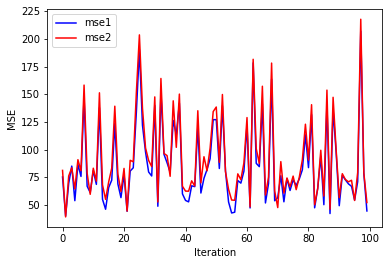

In [23]:
# g.)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
i = 0
mse1_list = []
mse2_list = []

for i in range(0, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    lm_md1 = LinearRegression().fit(X_train, Y_train)
    preds1 = lm_md1.predict(X_test)
    mse1 = np.mean(np.power(preds1 - Y_test, 2))
    mse1_list.append(mse1)
    
    # Model 2
    X2_train = X_train[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]
    X2_test = X_test[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]
    lm_md2 = LinearRegression().fit(X2_train, Y_train)
    preds2 = lm_md2.predict(X2_test)
    mse2 = np.mean(np.power(preds2 - Y_test, 2))
    mse2_list.append(mse2)
    i = i + 1
    
# Plotting results
plt.plot([i for i in range(0, 100)], mse1_list, color = 'b', label = 'mse1')
plt.plot([i for i in range(0, 100)],mse2_list, color = 'r', label = 'mse2')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [ ]:
# From the plot shown, we see that the first model consistantly has a lower mse than the second meaning
# the model being most accurate on the test data is the first one. 